In [5]:
import os

dir = str(os.getcwd())
print(dir)
split_dir = dir.split('\\')

for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print(os.getcwd())

c:\Users\AndreLopes
c:\Users\AndreLopes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='credit_card_churn.csv', delimiter=',')

df.info()

df.isna().sum()

# Drop rows with the same client ID
df.drop_duplicates(subset='CLIENTNUM')

In [167]:
# Drop CLIENTNUM and Naive Bayes related columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)

# Classify the types of features in the dataframe
cat_feats = []
num_feats = []
for feat in df.columns:
    if feat == 'Attrition_Flag':
        None
    else:
        if df[feat].dtype == 'O':
            cat_feats.append(feat)
        else:
            num_feats.append(feat)

print('There are {} categorical features: {}'.format(len(cat_feats), cat_feats))
print('There are {} numerical features: {}'.format(len(num_feats), num_feats))

# Encode the categorical columns
dummies = pd.get_dummies(df[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']], drop_first=True)

# Merge encoded columns with original dataframe
df2 = df.join(dummies)

# Drop categorical columns
df2 = df2.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

There are 5 categorical features: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
There are 14 numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


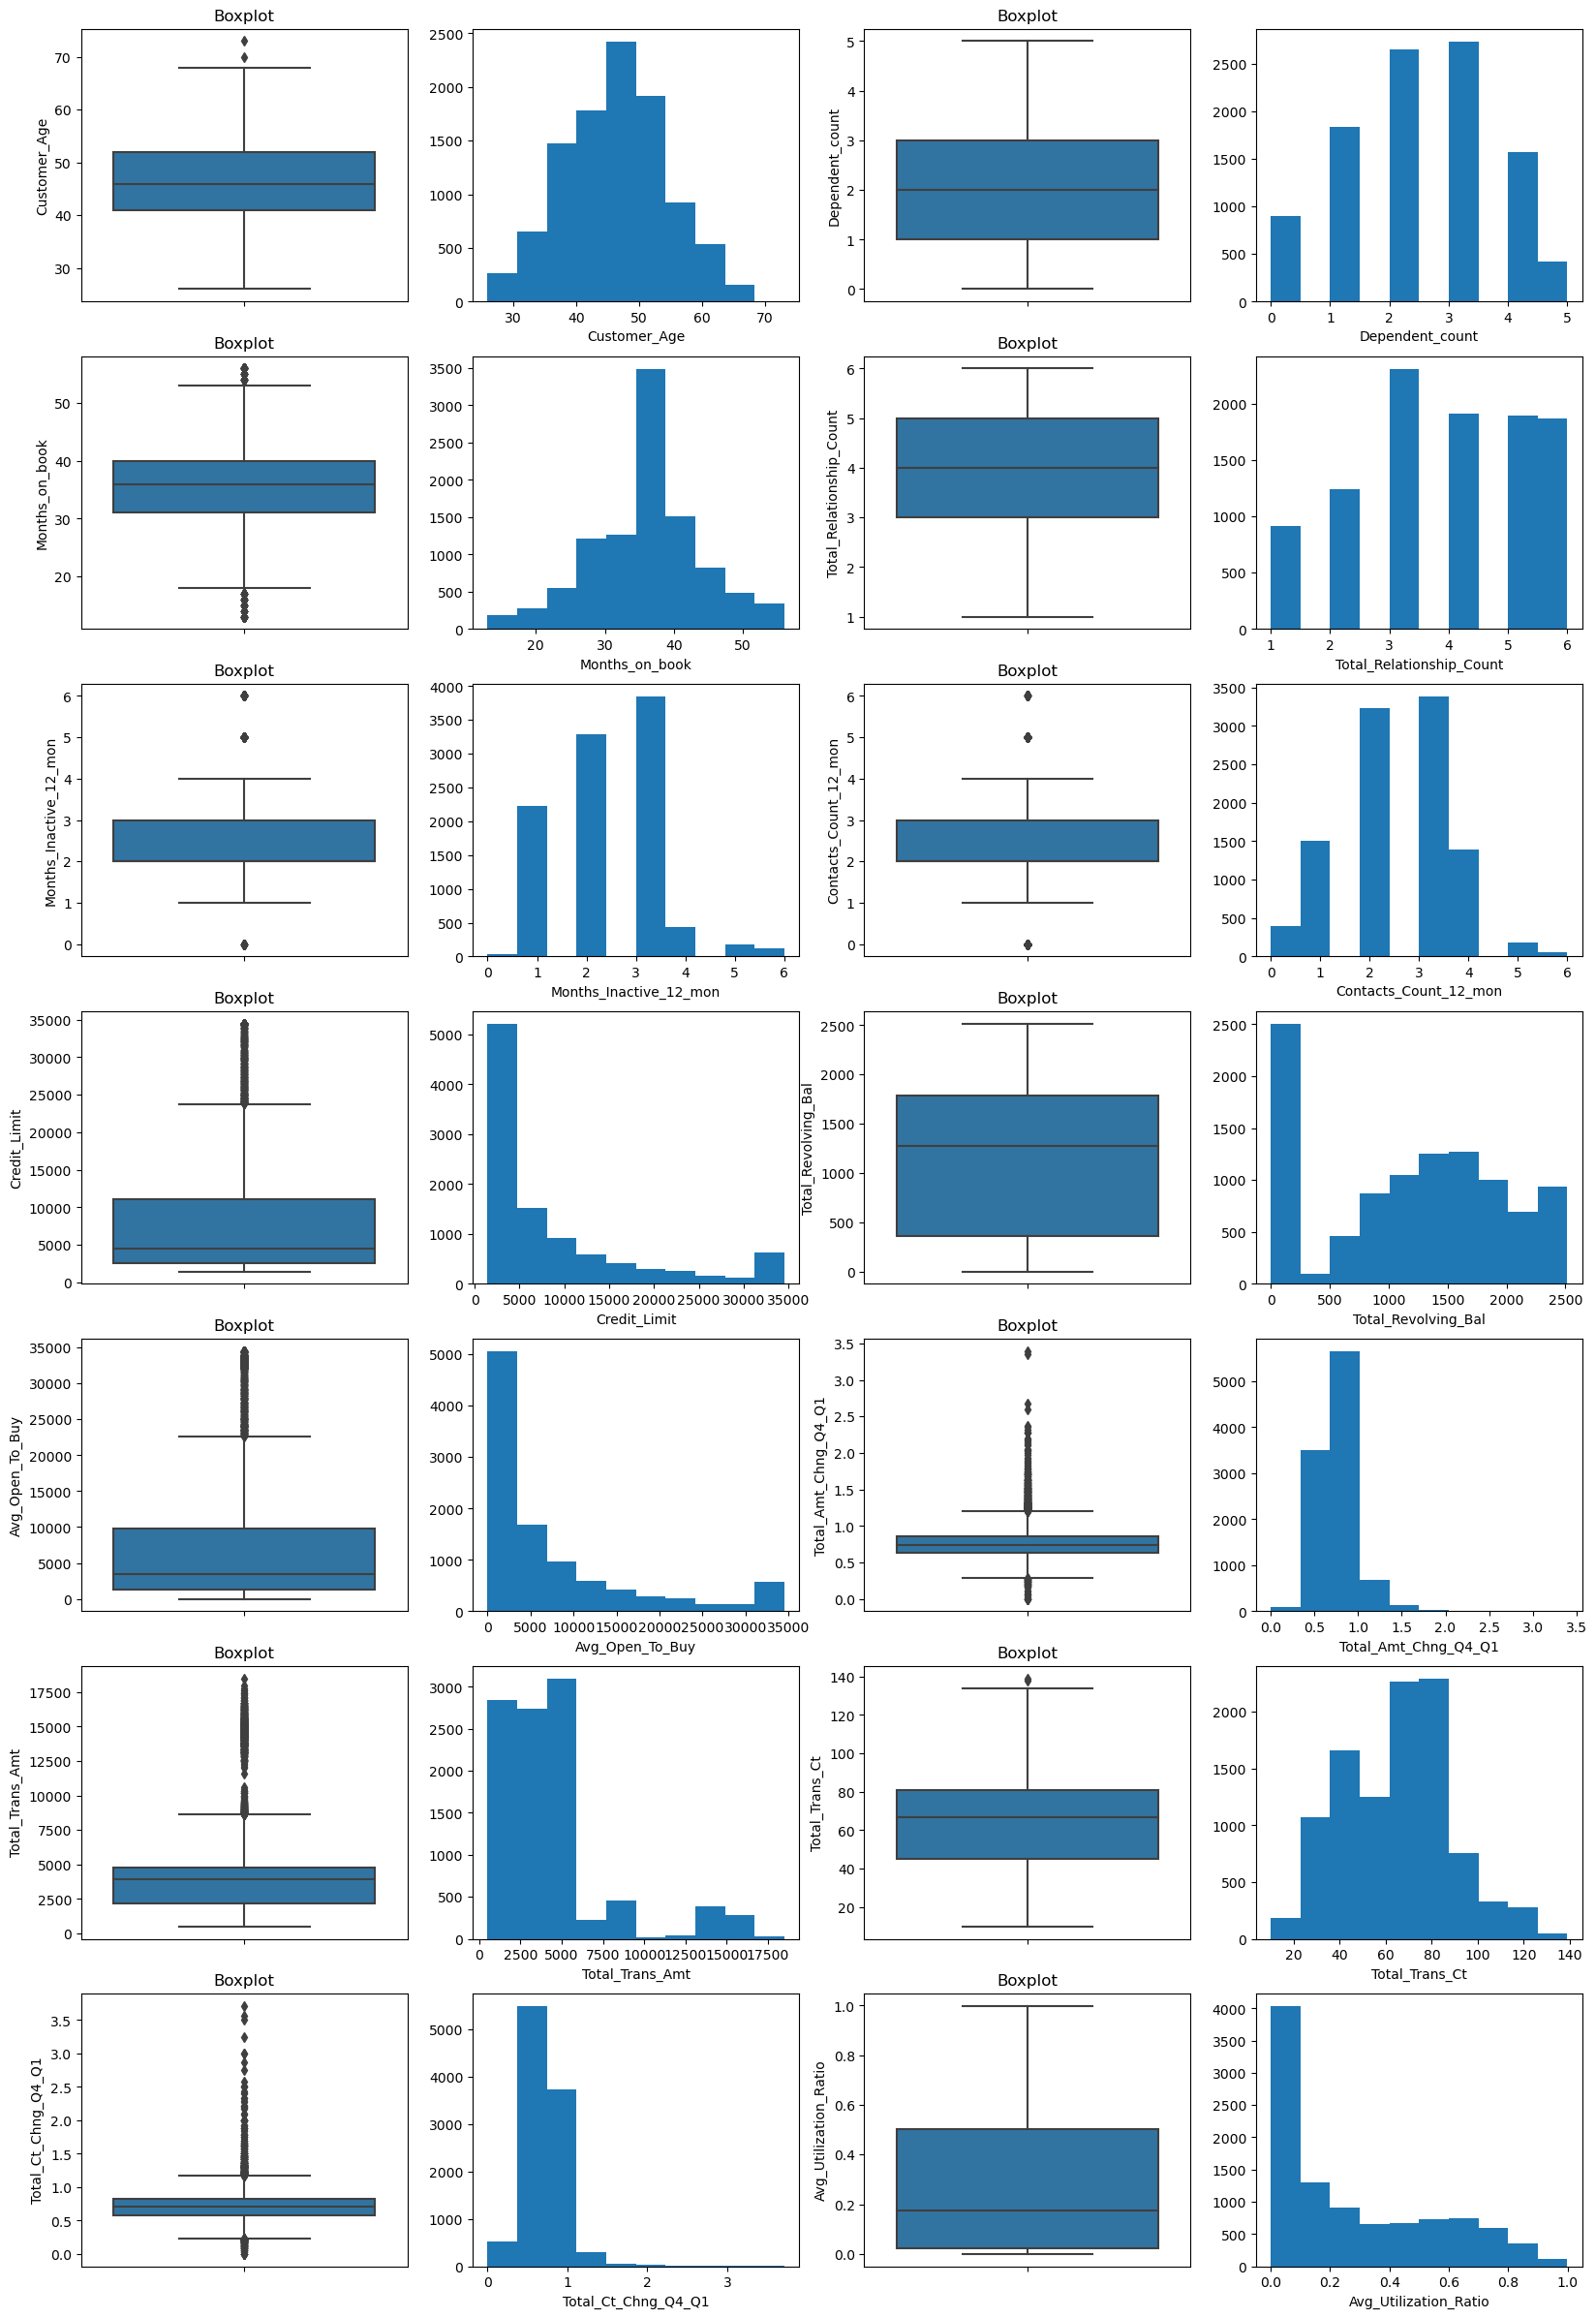

   Attrition_Flag_Existing Customer  Gender_M  Education_Level_Doctorate  \
0                                 1         1                          0   
1                                 1         0                          0   
2                                 1         1                          0   
3                                 1         0                          0   
4                                 1         1                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                      

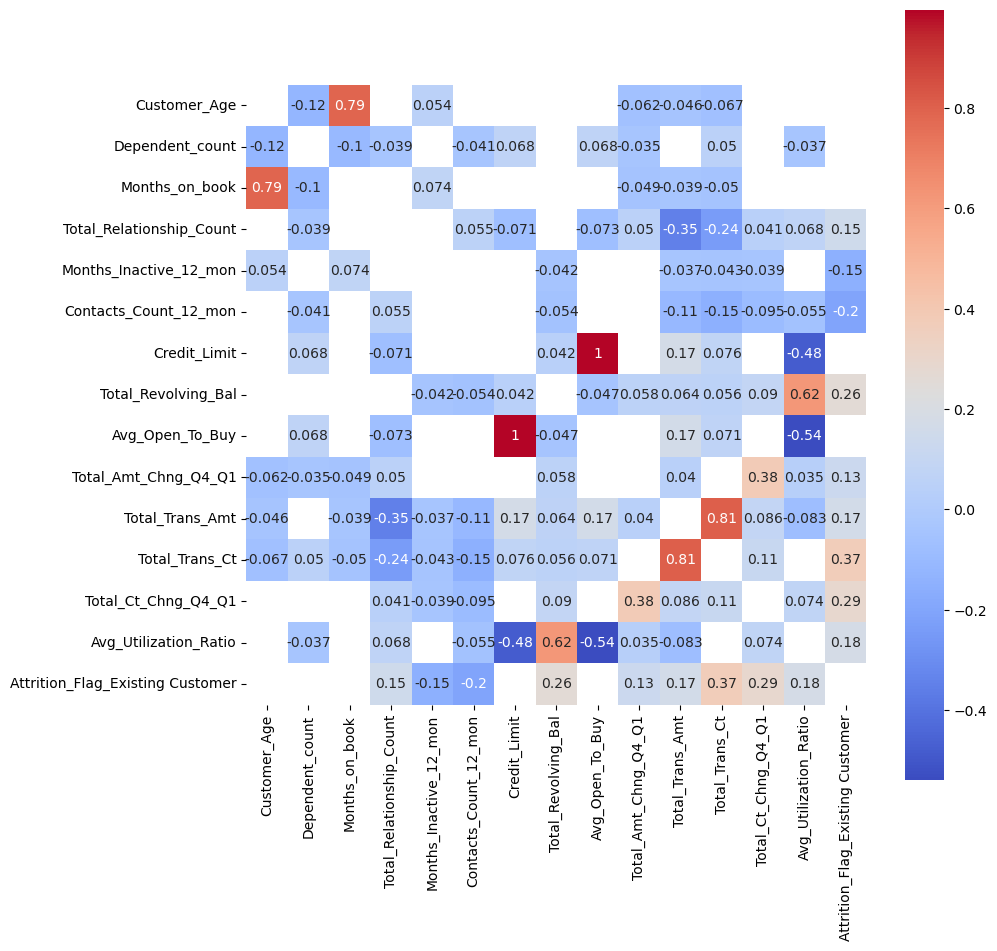

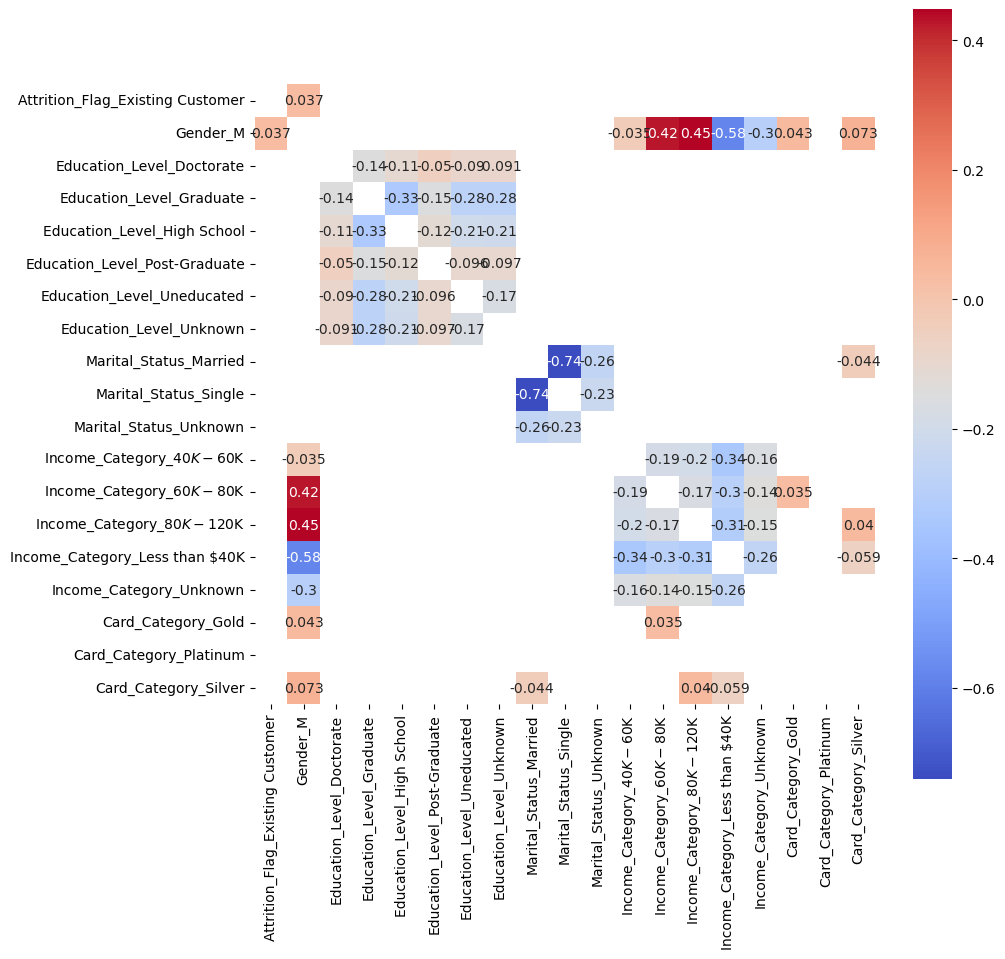

In [172]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Boxplots, histograms
plt.figure(figsize=(20, 30))

for i,feat in enumerate(num_feats):
    # Boxplot
    plt.subplot(7,4,2*i+1)
    sns.boxplot(y=df[num_feats[i]])
    plt.title('Boxplot')

    # Histogram
    plt.subplot(7,4,2*i+2)
    plt.hist(x=df[num_feats[i]])
    plt.xlabel(feat)    

plt.show()

# Numerical features correlations heatmap
df_num = df2[num_feats]
df_num = df_num.join(df2['Attrition_Flag_Existing Customer'])
df_num_corrs = df_num.corr(method='pearson', numeric_only=True)
pval = df_num.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_num_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)

# Categorical features correlations heatmap
df_cat = dummies
df_cat_corrs = df_cat.corr(method='pearson', numeric_only=False)
pval = df_cat.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_cat_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)